In [377]:
# Import library yang dibutuhkan 
import pandas as pd 
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [378]:
# Membuat Fungsi Untuk Mengubah Query Menjadi Dataframe
def run_query(query):
    conn = sqlite3.connect("olist.db")
    return pd.read_sql(query, conn)

In [379]:
# Membuat Fungsi untuk menampilkan tabel dari database olist 
def show_tables():
    query = '''
          SELECT * 
          FROM sqlite_master 
          WHERE type IN ("table", "view");
          '''
    return run_query(query)

In [380]:
# Menampilkan tabel pada database olist 
show_tables()

,type,name,tbl_name,rootpage,sql
0,table,olist_order_customer_dataset,olist_order_customer_dataset,2,"CREATE TABLE ""olist_order_customer_dataset"" (\..."
1,table,olist_order_dataset,olist_order_dataset,2644,"CREATE TABLE ""olist_order_dataset"" (\n""index"" ..."
2,table,olist_order_reviews_dataset,olist_order_reviews_dataset,7660,"CREATE TABLE ""olist_order_reviews_dataset"" (\n..."
3,table,olist_order_payments_dataset,olist_order_payments_dataset,11735,"CREATE TABLE ""olist_order_payments_dataset"" (\..."
4,table,olist_order_items_dataset,olist_order_items_dataset,13754,"CREATE TABLE ""olist_order_items_dataset"" (\n""i..."
5,table,olist_products_dataset,olist_products_dataset,18289,"CREATE TABLE ""olist_products_dataset"" (\n""inde..."
6,table,olist_sellers_dataset,olist_sellers_dataset,18983,"CREATE TABLE ""olist_sellers_dataset"" (\n""index..."
7,table,olist_geolocation_dataset,olist_geolocation_dataset,19040,"CREATE TABLE ""olist_geolocation_dataset"" (\n""i..."
8,table,product_category_name_translation,product_category_name_translation,33966,"CREATE TABLE ""product_category_name_translatio..."


karena hanya ingin menganalisis review customer maka tabel yang dibutuhkan hanya olist_order_dataset dan olist_order_reviews_dataset

In [381]:
# Menggabungkan tabel olist_order_dataset dan olis_order_reviews_datase
df ='''
    SELECT 
        od.order_id,
        od.order_status,
        od.order_purchase_timestamp AS purchase_date,
        od.order_estimated_delivery_date AS estimated_delivery_date,
        od.order_delivered_customer_date,
        rv.review_score,
        rv.review_creation_date
    FROM olist_order_dataset AS od
    LEFT JOIN olist_order_reviews_dataset AS rv
        ON od.order_id = rv.order_id
    '''
df = run_query(df)
df

,order_id,order_status,purchase_date,estimated_delivery_date,order_delivered_customer_date,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,4.0,2017-10-11 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,2018-08-07 15:27:45,4.0,2018-08-08 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,2018-08-17 18:06:29,5.0,2018-08-18 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,2017-12-02 00:28:42,5.0,2017-12-03 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,2018-02-16 18:17:02,5.0,2018-02-17 00:00:00
...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-28 00:00:00,2017-03-17 15:08:01,5.0,2017-03-22 00:00:00
99988,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-03-02 00:00:00,2018-02-28 17:37:56,4.0,2018-03-01 00:00:00
99989,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-27 00:00:00,2017-09-21 11:24:17,5.0,2017-09-22 00:00:00
99990,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-02-15 00:00:00,2018-01-25 23:32:54,2.0,2018-01-26 00:00:00


In [382]:
# Melihat info data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99992 non-null  object 
 1   order_status                   99992 non-null  object 
 2   purchase_date                  99992 non-null  object 
 3   estimated_delivery_date        99992 non-null  object 
 4   order_delivered_customer_date  97005 non-null  object 
 5   review_score                   99224 non-null  float64
 6   review_creation_date           99224 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.3+ MB


Berdasarkan info data diatas :
- terdapat 99992 baris dan 7 kolom
- tipe data purchase, date estimated_delivery_date,  delivered_customer_date, review_creation_date masih berupa object 
- tipe data review_score masih berupa float 
- terdapat missing value


# Menangani Missing Value

In [383]:
# Membuat fungsi untuk mengidentifikasi missing value 
def missing_value(data):
    total = data.isna().sum().sort_values(ascending = False)
    persentase = (data.isna().sum()*100/data.isna().count()).sort_values(ascending = False) 
    tabel = {
            "Missing Data": total, 
            "Percentage (%)": persentase
            }
    tabel = pd.DataFrame(tabel)
    return tabel

In [384]:
# cek missing value pada data df 
missing_value(df)

,Missing Data,Percentage (%)
order_delivered_customer_date,2987,2.987239
review_score,768,0.768061
review_creation_date,768,0.768061
order_id,0,0.000000
order_status,0,0.000000
purchase_date,0,0.000000
estimated_delivery_date,0,0.000000


Berdasarkan tabel di atas didapatkan :
- terdapat missing value  sebesar 2,98% pada delivered_customer_date 
- terdapat missing value kurang dari 1% pada review_score dan review_creation_date


In [385]:
# Hapus missing value ada kolom review score dan review creation date
df.dropna(subset=["review_score", "review_creation_date"], inplace=True)

In [386]:
# cek missing value 
missing_value(df)

,Missing Data,Percentage (%)
order_delivered_customer_date,2865,2.887406
order_id,0,0.000000
order_status,0,0.000000
purchase_date,0,0.000000
estimated_delivery_date,0,0.000000
review_score,0,0.000000
review_creation_date,0,0.000000


In [387]:
# Melihat missing value pada kolom order_delivered_date
delivered_date_NaT = df[df["order_delivered_customer_date"].isna()]
delivered_date_NaT

,order_id,order_status,purchase_date,estimated_delivery_date,order_delivered_customer_date,review_score,review_creation_date
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-05-09 00:00:00,None,2.0,2017-05-13 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018-06-28 00:00:00,None,1.0,2018-07-01 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-03 17:44:42,2018-08-21 00:00:00,None,3.0,2018-08-25 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-03 14:22:03,2017-10-03 00:00:00,None,5.0,2017-10-05 00:00:00
162,36530871a5e80138db53bcfd8a104d90,shipped,2017-05-09 11:48:37,2017-06-08 00:00:00,None,1.0,2017-06-14 00:00:00
...,...,...,...,...,...,...,...
99834,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:44,2018-10-01 00:00:00,None,5.0,2018-07-24 00:00:00
99864,e9e64a17afa9653aacf2616d94c005b8,processing,2018-01-05 23:07:24,2018-02-06 00:00:00,None,1.0,2018-02-10 00:00:00
99898,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:47,2018-09-27 00:00:00,None,4.0,2018-07-31 00:00:00
99899,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:04,2017-09-15 00:00:00,None,1.0,2017-09-20 00:00:00


In [388]:
order_status_count = delivered_date_NaT["order_status"].value_counts()
order_status_count

shipped        1043
canceled        603
unavailable     597
invoiced        313
processing      296
delivered         8
created           3
approved          2
Name: order_status, dtype: int64

Berdasarkan tabel dapat dilihat bahwa waktu pengiriman barang melebihi waktu estimasi barang sampai ke customer. Terdapat sekitar 600 order bertatus canceled dan unavailable dimana waktu pesanan tiba tidak diketahui. Hal ini wajar karena pesanan tersebut telah dibatalkan.   Asumsi saya terhadap status order lainnya yang waktu pesanan tiba tidak diketahui antara lain :
- pesanan mungkin masih dalam perjalanan
- pesanan hilang sehingga tidak diterima customer
- atau adanya kesalahan sistem.  

missing value pada kolom order_delivered_customer_date akan diabaikan dahulu karena dapat mempengaruhi hasil analisa review customer 

# Menangani Duplikat

In [389]:
# Melihat data duplikat 
df[df.duplicated(keep = False)]

,order_id,order_status,purchase_date,estimated_delivery_date,order_delivered_customer_date,review_score,review_creation_date
2392,9105e733a6a8fcccf4fced822e1a67ae,delivered,2017-12-13 21:34:31,2018-01-12 00:00:00,2017-12-18 21:46:33,5.0,2017-12-19 00:00:00
2393,9105e733a6a8fcccf4fced822e1a67ae,delivered,2017-12-13 21:34:31,2018-01-12 00:00:00,2017-12-18 21:46:33,5.0,2017-12-19 00:00:00
3491,cbf088f9ac169d9c7eddcaa9c5e465fe,delivered,2018-02-10 15:13:12,2018-03-12 00:00:00,2018-03-02 15:27:57,5.0,2018-03-03 00:00:00
3492,cbf088f9ac169d9c7eddcaa9c5e465fe,delivered,2018-02-10 15:13:12,2018-03-12 00:00:00,2018-03-02 15:27:57,5.0,2018-03-03 00:00:00
4186,246b14cc444e8a7df0afd80495dfa052,delivered,2018-07-04 01:20:01,2018-07-19 00:00:00,2018-07-06 19:22:45,4.0,2018-07-07 00:00:00
...,...,...,...,...,...,...,...
98018,1544b91291000836c72384f035436fbf,delivered,2017-08-14 11:04:23,2017-09-05 00:00:00,2017-08-18 20:23:07,5.0,2017-08-19 00:00:00
98855,2f8f31eb2f7b6572836d662a6625c8e4,delivered,2017-02-07 22:52:44,2017-03-06 00:00:00,2017-02-15 12:54:49,5.0,2017-02-15 00:00:00
98856,2f8f31eb2f7b6572836d662a6625c8e4,delivered,2017-02-07 22:52:44,2017-03-06 00:00:00,2017-02-15 12:54:49,5.0,2017-02-15 00:00:00
99394,66f943fd426ac8716ef6b6b97ace8bd8,delivered,2018-04-19 08:26:03,2018-05-09 00:00:00,2018-05-04 19:51:06,4.0,2018-05-10 00:00:00


Berdasarkan tabel diatas diketahui terdapat 248 baris duplikat

In [390]:
# Menghapus data duplikat
df.drop_duplicates(keep = "first", inplace = True)

In [391]:
# Melihat apakah masih ada data duplikat
df.duplicated().any()

False

Data duplikat sudah terhapus

In [392]:
# Melihat ukuran dataframe setelah duplikat dihapus
print(f"data df memiliki ukuran {df.shape}")

data df memiliki ukuran (99098, 7)


terdapat 999098 baris dan 7 kolom

# Data Formatting


Berdasarkan data info di atas, tipe data purchase_date, estimated_delivery_date, delivered_customer_date, dan review_creation_date masih berbentuk object, sedangkah review_score masih berbentuk float

In [393]:
# mengubah tipe data purchase_date menjadi datetime
df["purchase_date"] = pd.to_datetime(df["purchase_date"])

# mengubah tipe data date estimated_delivery_date menjadi datetime
df["estimated_delivery_date"] = pd.to_datetime(df["estimated_delivery_date"])

# mengubah tipe data delivered_customer_date menjadi datetime
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

# mengubah tipe data review_creation_date menjadi datetime
df["review_creation_date"] = pd.to_datetime(df["review_creation_date"])

# mengubah tipe data review_score int
df["review_score"] = df["review_score"].astype(int)


agar order id lebih mudah dibaca saya akan mengubahnya

In [394]:
# mengubah value pada kolom order_id agar mudah dibaca 
df["order_id"] = pd.factorize(df["order_id"])[0]
df["order_id"] = df["order_id"].map(lambda x: f"order{x}")

In [395]:
# Melakukan reset index 
df.reset_index(drop = True)

,order_id,order_status,purchase_date,estimated_delivery_date,order_delivered_customer_date,review_score,review_creation_date
0,order0,delivered,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,4,2017-10-11
1,order1,delivered,2018-07-24 20:41:37,2018-08-13,2018-08-07 15:27:45,4,2018-08-08
2,order2,delivered,2018-08-08 08:38:49,2018-09-04,2018-08-17 18:06:29,5,2018-08-18
3,order3,delivered,2017-11-18 19:28:06,2017-12-15,2017-12-02 00:28:42,5,2017-12-03
4,order4,delivered,2018-02-13 21:18:39,2018-02-26,2018-02-16 18:17:02,5,2018-02-17
...,...,...,...,...,...,...,...
99093,order98668,delivered,2017-03-09 09:54:05,2017-03-28,2017-03-17 15:08:01,5,2017-03-22
99094,order98669,delivered,2018-02-06 12:58:58,2018-03-02,2018-02-28 17:37:56,4,2018-03-01
99095,order98670,delivered,2017-08-27 14:46:43,2017-09-27,2017-09-21 11:24:17,5,2017-09-22
99096,order98671,delivered,2018-01-08 21:28:27,2018-02-15,2018-01-25 23:32:54,2,2018-01-26


In [396]:
# Melihat info data  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99098 entries, 0 to 99991
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99098 non-null  object        
 1   order_status                   99098 non-null  object        
 2   purchase_date                  99098 non-null  datetime64[ns]
 3   estimated_delivery_date        99098 non-null  datetime64[ns]
 4   order_delivered_customer_date  96235 non-null  datetime64[ns]
 5   review_score                   99098 non-null  int64         
 6   review_creation_date           99098 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(1), object(2)
memory usage: 6.0+ MB


In [397]:
# Melihat summary data
df.describe(include = "all").T

<ipython-input-397-75e9157507b6>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = "all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
order_id,99098,98673,order36914,3,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,99098,8,delivered,96237,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_date,99098,98115,2017-11-22 11:39:00,4,2016-09-04 21:15:19,2018-10-17 17:30:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estimated_delivery_date,99098,459,2017-12-20 00:00:00,525,2016-09-30 00:00:00,2018-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_delivered_customer_date,96235,95022,2018-05-08 19:36:48,3,2016-10-11 13:46:32,2018-10-17 13:22:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_score,99098.0,NaN,NaN,NaN,NaT,NaT,4.085885,1.347792,1.0,4.0,5.0,5.0,5.0
review_creation_date,99098,636,2017-12-19 00:00:00,461,2016-10-02 00:00:00,2018-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA 
1. melihat proporsi review skor
2. melihat proprsi review skor terhadap status order 
3. Melihat hubungan antara waktu pengiriman dengan review score 


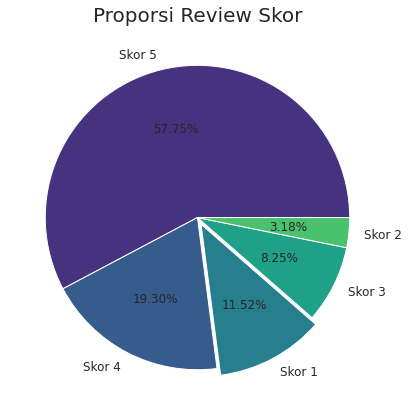

In [398]:
# Proporsi review score
review_score = df["review_score"].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(
    x=review_score,
    labels=["Skor 5", "Skor 4", "Skor 1", "Skor 3", "Skor 2"],
    explode=(0, 0, 0.05, 0, 0),
    colors=sns.color_palette("viridis"),
    autopct="%1.2f%%",
    textprops={"fontsize": 12},
)
plt.title("Proporsi Review Skor", fontsize=20)
plt.show()

- hampir 12% customer memberikan skor 1 


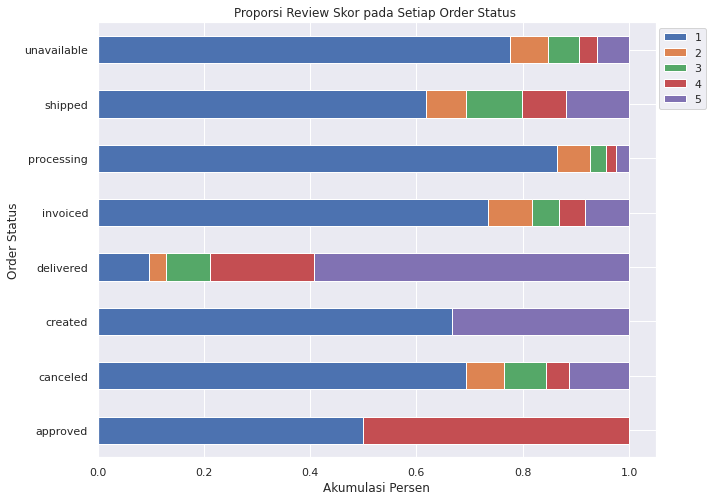

In [399]:
# Proporsi review score terhadap order status
cross_tab_prop = pd.crosstab(
    index=df["order_status"], columns=df["review_score"], normalize="index"
)

cross_tab_prop.plot(
    kind="barh", stacked=True, color=sns.color_palette(), figsize=(10, 8)
)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.title("Proporsi Review Skor pada Setiap Order Status ")
plt.ylabel("Order Status")
plt.xlabel("Akumulasi Persen")
plt.show()

In [400]:
# Menghitung waktu pengiriman setiap order
delivery_time = df["order_delivered_customer_date"] - df["purchase_date"]
delivery_time_seconds = delivery_time.apply(lambda x: x.total_seconds())
df["delivery_time_days"] = round(delivery_time_seconds / 86400, 2)

# Melihat summary data
df["delivery_time_days"].describe()


count    96235.000000
mean        12.524996
std          9.459966
min          0.530000
25%          6.760000
50%         10.210000
75%         15.690000
max        208.350000
Name: delivery_time_days, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


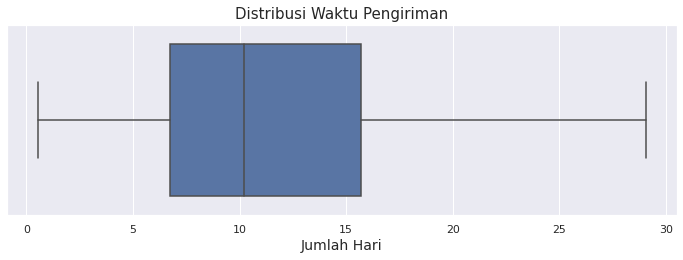

In [401]:
# Membuat boxplot delivery time:
plt.figure(figsize=(12, 3.5))
sns.boxplot(df.delivery_time_days, orient="h", showfliers=False)
plt.xlabel("Jumlah Hari", fontsize=14)
plt.yticks([])
plt.title("Distribusi Waktu Pengiriman", fontsize=15)
plt.show()

normalnya waktu pengiriman membutuhkan sekitar 7 - 16 hari

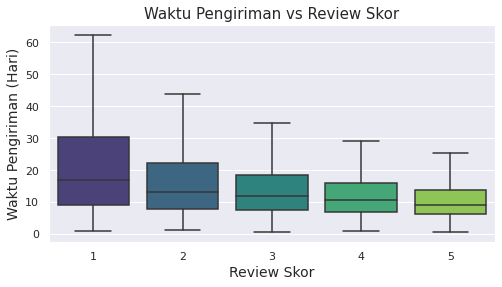

In [402]:
# Boxplot delivery time vs review score
plt.figure(figsize=(8, 4))
sns.boxplot(
    x="review_score",
    y="delivery_time_days",
    data=df,
    showfliers=False,
    palette="viridis",
)
plt.xlabel("Review Skor", fontsize=14)
plt.ylabel("Waktu Pengiriman (Hari)", fontsize=14)
plt.title("Waktu Pengiriman vs Review Skor", fontsize=15)
plt.show()


Terlihat ada hubungan antara waktu pengiriman dengan review skor. Semakin lama waktu pengiriman pesanan, semakin besar kemungkinan customer memberikan nilai skor yang rendah

